dataset price bitcoin: https://www.investing.com/crypto/bitcoin/historical-data

dataset twitter: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets

In [619]:
import pandas as pd
from tqdm import tqdm
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  # natural language processing
nltk.download("stopwords")
nltk.downloader.download('vader_lexicon')
from nltk.corpus import stopwords

from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import sklearn.impute
import sklearn.preprocessing
pd.options.plotting.backend = "plotly"

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Formas de limpeza dos twitter
# https://www.kaggle.com/code/offmann/bitcoin-tweets-dataviz-transformers-sentiment-an

""" Atributos da base de twitters
1	  user_name	The name of the user, as they’ve defined it.
2	  user_location	The user-defined location for this account’s profile.
3	  user_description	The user-defined UTF-8 string describing their account.
4	  user_created	Time and date, when the account was created.
5	  user_followers	The number of followers an account currently has.
6	  user_friends	The number of friends an account currently has.
7	  user_favourites	The number of favorites an account currently has
8	  user_verified	When true, indicates that the user has a verified account
9	  date	UTC time and date when the Tweet was created
10	text	The actual UTF-8 text of the Tweet
11	hashtags	All the other hashtags posted in the tweet along with #Bitcoin & #btc
12	source	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web
13	is_retweet	Indicates whether this Tweet has been Retweeted by the authenticating user. """

""" Atributos base 03 - bitcoin info
Data: Data em que as métricas foram registradas. (Date)
Contagem de Endereços Ativos: Número de endereços únicos que realizaram transações na rede. (AdrActCnt)
Contagem de Endereços com Saldo de 100 mil ou mais: Número de endereços com saldo de 100 mil ou mais unidades da criptomoeda. (AdrBal1in100KCnt)
Contagem de Endereços com Saldo de 100 milhões ou mais: Número de endereços com saldo de 100 milhões ou mais unidades da criptomoeda. (AdrBal1in100MCnt)
Contagem de Endereços com Saldo de 10 bilhões ou mais: Número de endereços com saldo de 10 bilhões ou mais unidades da criptomoeda. (AdrBal1in10BCnt)
Contagem de Endereços com Saldo de 10 mil ou mais: Número de endereços com saldo de 10 mil ou mais unidades da criptomoeda. (AdrBal1in10KCnt)
Contagem de Endereços com Saldo de 10 milhões ou mais: Número de endereços com saldo de 10 milhões ou mais unidades da criptomoeda. (AdrBal1in10MCnt)
Contagem de Endereços com Saldo de 1 bilhão ou mais: Número de endereços com saldo de 1 bilhão ou mais unidades da criptomoeda. (AdrBal1in1BCnt)
Contagem de Endereços com Saldo de 1 mil ou mais: Número de endereços com saldo de 1 mil ou mais unidades da criptomoeda. (AdrBal1in1KCnt)
Contagem de Endereços com Saldo de 1 milhão ou mais: Número de endereços com saldo de 1 milhão ou mais unidades da criptomoeda. (AdrBal1in1MCnt)
Contagem de Endereços com Saldo: Número total de endereços com saldo de qualquer valor. (AdrBalCnt)
Contagem de Endereços com Saldo Nativo de 0.001 ou mais: Número de endereços com saldo nativo de 0.001 ou mais unidades da criptomoeda. (AdrBalNtv0.001Cnt)
Contagem de Endereços com Saldo Nativo de 0.01 ou mais: Número de endereços com saldo nativo de 0.01 ou mais unidades da criptomoeda. (AdrBalNtv0.01Cnt)
Contagem de Endereços com Saldo Nativo de 0.1 ou mais: Número de endereços com saldo nativo de 0.1 ou mais unidades da criptomoeda. (AdrBalNtv0.1Cnt)
Contagem de Endereços com Saldo Nativo de 100 ou mais: Número de endereços com saldo nativo de 100 ou mais unidades da criptomoeda. (AdrBalNtv100Cnt)
Contagem de Endereços com Saldo Nativo de 100 mil ou mais: Número de endereços com saldo nativo de 100 mil ou mais unidades da criptomoeda. (AdrBalNtv100KCnt)
Contagem de Endereços com Saldo Nativo de 10 ou mais: Número de endereços com saldo nativo de 10 ou mais unidades da criptomoeda. (AdrBalNtv10Cnt)
Contagem de Endereços com Saldo Nativo de 10 mil ou mais: Número de endereços com saldo nativo de 10 mil ou mais unidades da criptomoeda. (AdrBalNtv10KCnt)
Contagem de Endereços com Saldo Nativo de 1 ou mais: Número de endereços com saldo nativo de 1 ou mais unidades da criptomoeda. (AdrBalNtv1Cnt)
Contagem de Endereços com Saldo Nativo de 1 mil ou mais: Número de endereços com saldo nativo de 1 mil ou mais unidades da criptomoeda. (AdrBalNtv1KCnt)
Contagem de Endereços com Saldo Nativo de 1 milhão ou mais: Número de endereços com saldo nativo de 1 milhão ou mais unidades da criptomoeda. (AdrBalNtv1MCnt)
Contagem de Endereços com Saldo em USD de 100 ou mais: Número de endereços com saldo em USD de 100 ou mais unidades. (AdrBalUSD100Cnt)
Contagem de Endereços com Saldo em USD de 100 mil ou mais: Número de endereços com saldo em USD de 100 mil ou mais unidades. (AdrBalUSD100KCnt)
Contagem de Endereços com Saldo em USD de 10 ou mais: Número de endereços com saldo em USD de 10 ou mais unidades. (AdrBalUSD10Cnt)
Contagem de Endereços com Saldo em USD de 10 mil ou mais: Número de endereços com saldo em USD de 10 mil ou mais unidades. (AdrBalUSD10KCnt)
Contagem de Endereços com Saldo em USD de 10 milhões ou mais: Número de endereços com saldo em USD de 10 milhões ou mais unidades. (AdrBalUSD10MCnt)
Contagem de Endereços com Saldo em USD de 1 ou mais: Número de endereços com saldo em USD de 1 ou mais unidades. (AdrBalUSD1Cnt)
Contagem de Endereços com Saldo em USD de 1 mil ou mais: Número de endereços com saldo em USD de 1 mil ou mais unidades. (AdrBalUSD1KCnt)
Contagem de Endereços com Saldo em USD de 1 milhão ou mais: Número de endereços com saldo em USD de 1 milhão ou mais unidades. (AdrBalUSD1MCnt)
Tempo de conclusão do Ativo no Fim do Dia do Ativo: Horário de conclusão do ativo no fim do dia. (AssetEODCompletionTime)
Contagem de Blocos: Número total de blocos na blockchain. (BlkCnt)
Tamanho Médio do Bloco em Bytes: Tamanho médio dos blocos em bytes. (BlkSizeMeanByte)
Peso Médio do Bloco: Peso médio dos blocos. (BlkWghtMean)
Peso Total do Bloco: Peso total dos blocos. (BlkWghtTot)
Atividade de Capitalização em USD no Último Ano: Atividade de capitalização em USD no último ano. (CapAct1yrUSD)
Valor Realizado de Mercado Atual: Valor de mercado realizado atual. (CapMVRVCur)
Valor Realizado de Mercado para Valor de Mercado Futuro: Valor de mercado realizado para valor de mercado futuro. (CapMVRVFF)
Valor de Mercado Atual em USD: Valor de mercado atual em USD. (CapMrktCurUSD)
Valor de Mercado Futuro em USD: Valor de mercado futuro em USD. (CapMrktFFUSD)
Valor Realizado em USD: Valor realizado em USD. (CapRealUSD)
Dificuldade do Último Bloco: Dificuldade do último bloco. (DiffLast)
Dificuldade Média: Dificuldade média. (DiffMean)
Taxa Média de Taxa por Byte Nativa: Taxa média de taxa por byte nativa. (FeeByteMeanNtv)
Taxa Média de Taxa: Taxa média de taxa. (FeeMeanNtv)
Taxa Média em USD: Taxa média em USD. (FeeMeanUSD)
Taxa Mediana Nativa: Taxa mediana nativa. (FeeMedNtv)
Taxa Mediana em USD: Taxa mediana em USD. (FeeMedUSD)
Taxa Total Nativa: Taxa total nativa. (FeeTotNtv)
Taxa Total em USD: Taxa total em USD. (FeeTotUSD)
Fluxo de Entrada de Trocas em Unidades Nativas: Fluxo de entrada de trocas em unidades nativas. (FlowInExNtv)
Fluxo de Entrada de Trocas em USD: Fluxo de entrada de trocas em USD. (FlowInExUSD)
Fluxo de Saída de Trocas em Unidades Nativas: Fluxo de saída de trocas em unidades nativas. (FlowOutExNtv)
Fluxo de Saída de Trocas em USD: Fluxo de saída de trocas em USD. (FlowOutExUSD)
Contagem de Transferências de Troca: Número de transferências de troca. (FlowTfrFromExCnt)
Taxa de Hash: Taxa de hash. (HashRate)
Taxa de Hash dos Últimos 30 Dias: Taxa de hash dos últimos 30 dias. (HashRate30d)
Contagem de Contratos Emitidos em Unidades Nativas: Número de contratos emitidos em unidades nativas. (IssContNtv)
Percentual de Contratos Emitidos Anualmente: Percentual de contratos emitidos anualmente. (IssContPctAnn)
Percentual de Contratos Emitidos Diariamente: Percentual de contratos emitidos diariamente. (IssContPctDay)
Valor de Contratos Emitidos em USD: Valor de contratos emitidos em USD. (IssContUSD)
Total Emitido em Unidades Nativas: Total emitido em unidades nativas. (IssTotNtv)
Total Emitido em USD: Total emitido em USD. (IssTotUSD)
Data da Prova de Trabalho: Data da prova de trabalho. (NDF)
NVT Ajustado: NVT ajustado. (NVTAdj)
NVT Ajustado em 90 Dias: NVT ajustado em 90 dias. (NVTAdj90)
NVT Ajustado Futuro: NVT ajustado futuro. (NVTAdjFF)
NVT Ajustado Futuro em 90 Dias: NVT ajustado futuro em 90 dias. (NVTAdjFF90)
Preço em BTC: Preço em BTC. (PriceBTC)
Preço em USD: Preço em USD. (PriceUSD)
ROI de 1 Ano: ROI de 1 ano. (ROI1yr)
ROI de 30 Dias: ROI de 30 dias. (ROI30d)
Receita Total em USD de Todos os Tempos: Receita total em USD de todos os tempos. (RevAllTimeUSD)
Receita de Hash em Unidades Nativas: Receita de hash em unidades nativas. (RevHashNtv)
Taxa de Receita de Hash: Taxa de receita de hash. (RevHashRateNtv)
Taxa de Receita de Hash em USD: Taxa de receita de hash em USD. (RevHashRateUSD)
Receita de Hash em USD: Receita de hash em USD. (RevHashUSD)
Receita em Unidades Nativas: Receita em unidades nativas. (RevNtv)
Receita em USD: Receita em USD. (RevUSD)
Relação de Estoque-Fluxo: Relação de estoque-fluxo. (SER)
Atividade de Suprimento em 10 Anos: Atividade de suprimento em 10 anos. (SplyAct10yr)
Atividade de Suprimento em 180 Dias: Atividade de suprimento em 180 dias. (SplyAct180d)
Atividade de Suprimento em 1 Dia: Atividade de suprimento em 1 dia. (SplyAct1d)
Atividade de Suprimento em 1 Ano: Atividade de suprimento em 1 ano. (SplyAct1yr)
Atividade de Suprimento em 2 Anos: Atividade de suprimento em 2 anos. (SplyAct2yr)
Atividade de Suprimento em 30 Dias: Atividade de suprimento em 30 dias. (SplyAct30d)
Atividade de Suprimento em 3 Anos: Atividade de suprimento em 3 anos. (SplyAct3yr)
Atividade de Suprimento em 4 Anos: Atividade de suprimento em 4 anos. (SplyAct4yr)
Atividade de Suprimento em 5 Anos: Atividade de suprimento em 5 anos. (SplyAct5yr)
Atividade de Suprimento em 7 Dias: Atividade de suprimento em 7 dias. (SplyAct7d)
Atividade de Suprimento em 90 Dias: Atividade de suprimento em 90 dias. (SplyAct90d)
Atividade de Suprimento de Todos os Tempos: Atividade de suprimento de todos os tempos. (SplyActEver)
Percentual de Suprimento de Atividade em 1 Ano: Percentual de suprimento de atividade em 1 ano. (SplyActPct1yr)
Suprimento de Endereço com Saldo de 100 mil ou mais: Suprimento de endereço com saldo de 100 mil ou mais. (SplyAdrBal1in100K)
Suprimento de Endereço com Saldo de 100 milhões ou mais: Suprimento de endereço com saldo de 100 milhões ou mais. (SplyAdrBal1in100M)
Suprimento de Endereço com Saldo de 10 bilhões ou mais: Suprimento de endereço com saldo de 10 bilhões ou mais. (SplyAdrBal1in10B)
Suprimento de Endereço com Saldo de 10 mil ou mais: Suprimento de endereço com saldo de 10 mil ou mais. (SplyAdrBal1in10K)
Suprimento de Endereço com Saldo de 10 milhões ou mais: Suprimento de endereço com saldo de 10 milhões ou mais. (SplyAdrBal1in10M)
Suprimento de Endereço com Saldo de 1 bilhão ou mais: Suprimento de endereço com saldo de 1 bilhão ou mais. (SplyAdrBal1in1B)
Suprimento de Endereço com Saldo de 1 mil ou mais: Suprimento de endereço com saldo de 1 mil ou mais. (SplyAdrBal1in1K)
Suprimento de Endereço com Saldo de 1 milhão ou mais: Suprimento de endereço com saldo de 1 milhão ou mais. (SplyAdrBal1in1M)
Suprimento de Endereço com Saldo Nativo de 0.001 ou mais: Suprimento de endereço com saldo nativo de 0.001 ou mais. (SplyAdrBalNtv0.001)
Suprimento de Endereço com Saldo Nativo de 0.01 ou mais: Suprimento de endereço com saldo nativo de 0.01 ou mais. (SplyAdrBalNtv0.01)
Suprimento de Endereço com Saldo Nativo de 0.1 ou mais: Suprimento de endereço com saldo nativo de 0.1 ou mais. (SplyAdrBalNtv0.1)
Suprimento de Endereço com Saldo Nativo de 1 ou mais: Suprimento de endereço com saldo nativo de 1 ou mais. (SplyAdrBalNtv1)
Suprimento de Endereço com Saldo Nativo de 10 ou mais: Suprimento de endereço com saldo nativo de 10 ou mais. (SplyAdrBalNtv10)
Suprimento de Endereço com Saldo Nativo de 100 ou mais: Suprimento de endereço com saldo nativo de 100 ou mais. (SplyAdrBalNtv100)
Suprimento de Endereço com Saldo Nativo de 100 mil ou mais: Suprimento de endereço com saldo nativo de 100 mil ou mais. (SplyAdrBalNtv100K)
Suprimento de Endereço com Saldo Nativo de 10 mil ou mais: Suprimento de endereço com saldo nativo de 10 mil ou mais. (SplyAdrBalNtv10K)
Suprimento de Endereço com Saldo Nativo de 1 mil ou mais: Suprimento de endereço com saldo nativo de 1 mil ou mais. (SplyAdrBalNtv1K)
Suprimento de Endereço com Saldo Nativo de 1 milhão ou mais: Suprimento de endereço com saldo nativo de 1 milhão ou mais. (SplyAdrBalNtv1M)
Suprimento de Endereço com Saldo em USD de 1 ou mais: Suprimento de endereço com saldo em USD de 1 ou mais. (SplyAdrBalUSD1)
Suprimento de Endereço com Saldo em USD de 10 ou mais: Suprimento de endereço com saldo em USD de 10 ou mais. (SplyAdrBalUSD10)
Suprimento de Endereço com Saldo em USD de 100 ou mais: Suprimento de endereço com saldo em USD de 100 ou mais. (SplyAdrBalUSD100)
Suprimento de Endereço com Saldo em USD de 100 mil ou mais: Suprimento de endereço com saldo em USD de 100 mil ou mais. (SplyAdrBalUSD100K)
Suprimento de Endereço com Saldo em USD de 10 mil ou mais: Suprimento de endereço com saldo em USD de 10 mil ou mais. (SplyAdrBalUSD10K)
Suprimento de Endereço com Saldo em USD de 10 milhões ou mais: Suprimento de endereço com saldo em USD de 10 milhões ou mais. (SplyAdrBalUSD10M)
Suprimento de Endereço com Saldo em USD de 1 mil ou mais: Suprimento de endereço com saldo em USD de 1 mil ou mais. (SplyAdrBalUSD1K)
Suprimento de Endereço com Saldo em USD de 1 milhão ou mais: Suprimento de endereço com saldo em USD de 1 milhão ou mais. (SplyAdrBalUSD1M)
Suprimento dos 100 Principais Endereços: Suprimento dos 100 principais endereços. (SplyAdrTop100)
Percentual de Suprimento Detido pelos 10% dos Principais Endereços: Percentual de suprimento detido pelos 10% dos principais endereços. (SplyAdrTop10Pct)
Percentual de Suprimento Detido pelos 1% dos Principais Endereços: Percentual de suprimento detido pelos 1% dos principais endereços. (SplyAdrTop1Pct)
Suprimento Circulante: Suprimento circulante. (SplyCur)
Suprimento Futuro Esperado em 10 Anos: Suprimento futuro esperado em 10 anos. (SplyExpFut10yr)
Suprimento em Circulação Excluindo Endereços de Troca: Suprimento em circulação excluindo endereços de troca. (SplyFF)
Suprimento Mínimo de Todos os Mineradores sem Saltos em Unidades Nativas: Suprimento mínimo de todos os mineradores sem saltos em unidades nativas. (SplyMiner0HopAllNtv)
Suprimento Mínimo de Todos os Mineradores sem Saltos em USD: Suprimento mínimo de todos os mineradores sem saltos em USD. (SplyMiner0HopAllUSD)
Suprimento Mínimo de Todos os Mineradores com 1 Salto em Unidades Nativas: Suprimento mínimo de todos os mineradores com 1 salto em unidades nativas. (SplyMiner1HopAllNtv)
Suprimento Mínimo de Todos os Mineradores com 1 Salto em USD: Suprimento mínimo de todos os mineradores com 1 salto em USD. (SplyMiner1HopAllUSD)
Contagem de Transações: Número total de transações na blockchain. (TxCnt)
Contagem de Transações por Segundo: Número total de transações por segundo. (TxCntSec)
Contagem de Transferências: Número total de transferências na blockchain. (TxTfrCnt)
Valor de Transferência Ajustado em Unidades Nativas: Valor de transferência ajustado em unidades nativas. (TxTfrValAdjNtv)
Valor de Transferência Ajustado em USD: Valor de transferência ajustado em USD. (TxTfrValAdjUSD)
Valor Médio de Transferência em Unidades Nativas: Valor médio de transferência em unidades nativas. (TxTfrValMeanNtv)
Valor Médio de Transferência em USD: Valor médio de transferência em USD. (TxTfrValMeanUSD)
Valor Mediano de Transferência em Unidades Nativas: Valor mediano de transferência em unidades nativas. (TxTfrValMedNtv)
Valor Mediano de Transferência em USD: Valor mediano de transferência em USD. (TxTfrValMedUSD)
Velocidade de Circulação em 1 Ano: Velocidade de circulação em 1 ano. (VelCur1yr)
Retorno Diário de Volatilidade em 180 Dias: Retorno diário de volatilidade em 180 dias. (VtyDayRet180d)
Retorno Diário de Volatilidade em 30 Dias: Retorno diário de volatilidade em 30 dias. (VtyDayRet30d)
"""

# Limpeza e pre processamento
# https://www.kaggle.com/code/jeanho/btc-project-eda


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joelm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joelm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


' Atributos base 03 - bitcoin info\nData: Data em que as métricas foram registradas. (Date)\nContagem de Endereços Ativos: Número de endereços únicos que realizaram transações na rede. (AdrActCnt)\nContagem de Endereços com Saldo de 100 mil ou mais: Número de endereços com saldo de 100 mil ou mais unidades da criptomoeda. (AdrBal1in100KCnt)\nContagem de Endereços com Saldo de 100 milhões ou mais: Número de endereços com saldo de 100 milhões ou mais unidades da criptomoeda. (AdrBal1in100MCnt)\nContagem de Endereços com Saldo de 10 bilhões ou mais: Número de endereços com saldo de 10 bilhões ou mais unidades da criptomoeda. (AdrBal1in10BCnt)\nContagem de Endereços com Saldo de 10 mil ou mais: Número de endereços com saldo de 10 mil ou mais unidades da criptomoeda. (AdrBal1in10KCnt)\nContagem de Endereços com Saldo de 10 milhões ou mais: Número de endereços com saldo de 10 milhões ou mais unidades da criptomoeda. (AdrBal1in10MCnt)\nContagem de Endereços com Saldo de 1 bilhão ou mais: Núme

In [620]:
# Load Tweet dataset
pd.set_option('display.max_rows', None)
df1 = pd.read_csv('../data/raw/Bitcoin_tweets.csv', nrows=50000)
df2 = pd.read_csv('../data/raw/BitcoinPriceHistory.csv')

In [621]:
# validação para remover data com dados incorretos quando está acima de cem mil instâncias da base 01
""" ['date'] == "['ETH', 'BTC', 'Bitcoin']"
df1 = df1.drop(df1.index[64943])
df1=df1.drop(df1.index[137067])
df1=df1.drop(df1.index[180573])
df1=df1.drop(df1.index[693191])
df1=df1.drop(df1.index[697393]) 
"""


' [\'date\'] == "[\'ETH\', \'BTC\', \'Bitcoin\']"\ndf1 = df1.drop(df1.index[64943])\ndf1=df1.drop(df1.index[137067])\ndf1=df1.drop(df1.index[180573])\ndf1=df1.drop(df1.index[693191])\ndf1=df1.drop(df1.index[697393]) \n'

In [622]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df1 = df1.dropna(subset=['date'])

In [623]:
# formatando as datas das bases para um padrão único
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.tz_localize('UTC').dt.strftime('%m-%d-%Y')

df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
df2['Date'] = df2['Date'].dt.tz_localize('UTC').dt.strftime('%m-%d-%Y')

In [624]:
# mapeamdo os atributos da base 02 pela data
df1['price'] = df1['date'].map(df2.set_index('Date')['Price'])

In [625]:
# rotulando do primeiro e segundo nome dos usuários
df1 = df1.assign(**{
    'first_name': df1['user_name'].str.split().str[0],
    'last_name': df1['user_name'].str.split().str[-1]
})

label_encoder = sklearn.preprocessing.LabelEncoder()
label_name = label_encoder.fit_transform(df1['first_name'])
df1['first_name'] = label_name
label_last_name = label_encoder.fit_transform(df1['last_name'])
df1['last_name'] = label_last_name

In [626]:
# convertido o valor price que esta como string para float
df1['price'] = df1['price'].replace({'(\\D)': ''}, regex=True).replace(',', '').astype(float)

In [627]:
# dataframe principal com as colunas utilizadas para análise de sentimentos
df = df1[[
    # atributos da base 01
    'first_name', 'last_name', 'user_description', 'date', 'text', 'user_followers', 'user_friends',
    # atributos da base 02
    'price']][:4000000]

In [628]:
# criado os atributos de dia, mês e ano.
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [629]:
# visualização de informações sobre os dados do dataframe
df.describe()
df.info()
df.isnull().sum()
#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        50000 non-null  int32         
 1   last_name         50000 non-null  int32         
 2   user_description  46586 non-null  object        
 3   date              50000 non-null  datetime64[ns]
 4   text              50000 non-null  object        
 5   user_followers    50000 non-null  float64       
 6   user_friends      50000 non-null  int64         
 7   price             50000 non-null  float64       
 8   day               50000 non-null  int32         
 9   month             50000 non-null  int32         
 10  year              50000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(5), int64(1), object(2)
memory usage: 3.2+ MB


first_name             0
last_name              0
user_description    3414
date                   0
text                   0
user_followers         0
user_friends           0
price                  0
day                    0
month                  0
year                   0
dtype: int64

In [630]:
# limpeza dos dados de descrição do usuário que estão com valores nulos e preenchimento, utilizando a modo, isso é o valor que aparece com mais frequência
df['user_description'].value_counts()
description_frequence = df['user_description'].value_counts()[0]
df['user_description'].fillna(description_frequence, inplace=True)
df['user_description'].isnull().sum()

C:\Users\joelm\AppData\Local\Temp\ipykernel_9308\2561411723.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  description_frequence = df['user_description'].value_counts()[0]
C:\Users\joelm\AppData\Local\Temp\ipykernel_9308\2561411723.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_description'].fillna(description_frequence, in

0

In [631]:
# remoção das linhas com dados faltantes
df.dropna(axis=0, inplace=True)

In [632]:
# visualização de informações sobre os dados do dataframe depois da limpeza do atributo "user_description"
df.describe()
df.info()
df.isnull().sum()

#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   first_name        50000 non-null  int32         
 1   last_name         50000 non-null  int32         
 2   user_description  50000 non-null  object        
 3   date              50000 non-null  datetime64[ns]
 4   text              50000 non-null  object        
 5   user_followers    50000 non-null  float64       
 6   user_friends      50000 non-null  int64         
 7   price             50000 non-null  float64       
 8   day               50000 non-null  int32         
 9   month             50000 non-null  int32         
 10  year              50000 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(5), int64(1), object(2)
memory usage: 3.2+ MB


first_name          0
last_name           0
user_description    0
date                0
text                0
user_followers      0
user_friends        0
price               0
day                 0
month               0
year                0
dtype: int64

In [633]:
# Convert the 'date' column to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Set 'date' as the index of the DataFrame
df1.set_index('date', inplace=True)

# Group the DataFrame by date and retrieve the first 10 rows of each group
df_grouped = df1.groupby(level=0).head(10)

# Display the resulting DataFrame
df_grouped['price'].value_counts()

price
448360.0    10
465086.0    10
463957.0    10
388529.0    10
392566.0    10
382976.0    10
479363.0    10
486434.0    10
471687.0    10
559066.0    10
515822.0    10
541118.0    10
451640.0    10
572651.0    10
577995.0    10
598638.0    10
Name: count, dtype: int64

In [634]:
# função para os textos em sequência de palavras
# converte tudo para caixa baixa
# removido valores que não são letras nem números
# separa as frases em uma lista de palavras
# remoção de palavras irrelevantes em inglês
# uso do lematizador de Porter para remover as terminações morfológicas e flexionais mais comuns das palavras em inglês.
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [635]:
cleantext=[]
for item in tqdm(df['text']):
    words=tweet_to_words(item)
    cleantext+=[words]
df['cleantext']=cleantext


100%|██████████| 50000/50000 [02:34<00:00, 322.60it/s]


In [636]:
cleantext=[]
for item in tqdm(df['user_description']):
    words=tweet_to_words(str(item))
    cleantext+=[words]
df['cleandescr']=cleantext

100%|██████████| 50000/50000 [01:29<00:00, 556.88it/s]


In [637]:
# função para juntar a lista de palavras
def unlist(list):
    return ''.join(f'{item} ' for item in list)

In [638]:

class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_detector = SentimentIntensityAnalyzer()

    def analyze_sentiment(self, text):
        sentiment_scores = self.sentiment_detector.polarity_scores(text)
        if sentiment_scores['compound'] >= 0.05:
            sentiment_scores['sentiment'] = 'positive'
        elif -0.05 < sentiment_scores['compound'] < 0.05:
            sentiment_scores['sentiment'] = 'neutral'
        else:
            sentiment_scores['sentiment'] = 'negative'
        return sentiment_scores

In [639]:
# computado a pontuação da intensidade dos sentimentos em frases dos twitters processadas com o bag of words.
def compute_vader_scores_text(df, label):
    sid = SentimentIntensityAnalyzer()
    analyzer = SentimentAnalyzer()
    
    df["text_negative"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["text_neutral"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["text_positive"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df['label'] = df[label].apply(lambda x: analyzer.analyze_sentiment(unlist(x))["sentiment"])
    df['text_sentiment'] = df[label].apply(lambda x: analyzer.analyze_sentiment(unlist(x))["sentiment"])
    
    return df

In [640]:
# computado a pontuação da intensidade dos sentimentos em frases das descrições dos twitters processadas com o bag of words.
def compute_vader_scores_description(df, label):
    sid = SentimentIntensityAnalyzer()
    analyzer = SentimentAnalyzer()
    
    df["description_negative"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neg"])
    df["description_neutral"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["neu"])
    df["description_positive"] = df[label].apply(lambda x: sid.polarity_scores(unlist(x))["pos"])
    df['description_sentiment'] = df[label].apply(lambda x: analyzer.analyze_sentiment(unlist(x))["sentiment"])
    df['description_sentiment_label'] = df[label].apply(lambda x: analyzer.analyze_sentiment(unlist(x))["sentiment"])

    return df

In [641]:
df = compute_vader_scores_text(df,'cleantext')
df = compute_vader_scores_description(df,'cleandescr')


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# instanciando
analyser = SentimentIntensityAnalyzer()

def analise(texto):
 df_analisado = analyser.polarity_scores(texto)['compound'] 
 return df_analisado

# aplicando a função e guardando na coluna new_review
df['new_text'] = df['text'].apply(analise)
df['new_text'] 

0        0.2960
1        0.8225
2        0.5719
3        0.3164
4        0.4019
5        0.4939
6        0.0000
7       -0.2023
8        0.0000
9        0.0000
10       0.0000
11      -0.2023
12       0.3595
13      -0.6523
14       0.0000
15       0.0000
16       0.0000
17       0.3164
18      -0.1280
19       0.0000
20      -0.5067
21      -0.4168
22      -0.5067
23       0.1779
24      -0.4019
25       0.3818
26       0.0000
27      -0.1154
28       0.0000
29       0.0000
30      -0.2023
31       0.7003
32       0.0258
33      -0.3400
34       0.2023
35       0.0000
36       0.2960
37       0.6892
38       0.0000
39      -0.2023
40       0.5106
41       0.0000
42       0.0000
43      -0.4003
44       0.5037
45       0.0000
46       0.0000
47       0.7650
48       0.2942
49       0.0000
50       0.0000
51       0.0000
52       0.6808
53       0.0000
54       0.8074
55       0.5261
56       0.0000
57       0.8176
58       0.0000
59       0.0000
60       0.0000
61      -0.1027
62      

In [642]:
def analise2(score):
  if score > 0:
    return 'positive'
 
  return 'negative'
  
 # aplicando
df['new_sentiment'] = df['new_text'].apply(analise2)
df['new_sentiment']

0        positive
1        positive
2        positive
3        positive
4        positive
5        positive
6        negative
7        negative
8        negative
9        negative
10       negative
11       negative
12       positive
13       negative
14       negative
15       negative
16       negative
17       positive
18       negative
19       negative
20       negative
21       negative
22       negative
23       positive
24       negative
25       positive
26       negative
27       negative
28       negative
29       negative
30       negative
31       positive
32       positive
33       negative
34       positive
35       negative
36       positive
37       positive
38       negative
39       negative
40       positive
41       negative
42       negative
43       negative
44       positive
45       negative
46       negative
47       positive
48       positive
49       negative
50       negative
51       negative
52       positive
53       negative
54       positive
55       p

In [643]:

from sklearn.metrics import accuracy_score # importando a função

# printando a acurácia
acuracia = accuracy_score(df['label'], df['new_sentiment'])
print('A acurácia do modelo foi', acuracia)

A acurácia do modelo foi 0.41284


In [644]:
# rotulando o sentimento da descrição com um valor numérico
label_description_sentiment = label_encoder.fit_transform(df['description_sentiment'])
df['description_sentiment'] = label_description_sentiment

# rotulando o sentimento da text com um valor numérico
label_text_sentiment = label_encoder.fit_transform(df['text_sentiment'])
df['text_sentiment'] = label_text_sentiment

In [645]:
# base com os 20 atributos principais.
df_origin = df[['date','price', 'first_name', 'last_name', 'user_followers',
                'user_friends', 'day', 'month', 'year', 
                'description_positive', 'description_negative', 'description_neutral', 
                'description_sentiment', 'description_sentiment_label', 'text_positive', 
                'text_negative', 'text_neutral', 'text_sentiment', 'new_sentiment', 'label']]



df_origin.to_csv('../data/processed/database_origin.csv', index=False)

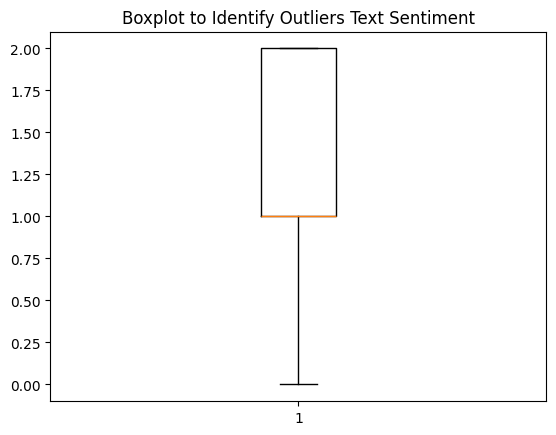

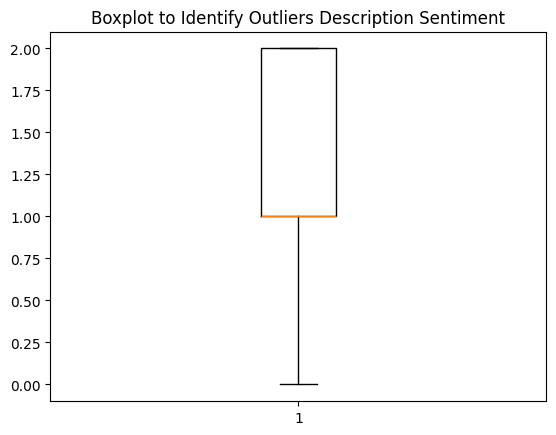

In [646]:
# plotando os graficos boxplot
import matplotlib.pyplot as plt

plt.boxplot(df['text_sentiment'])
plt.title("Boxplot to Identify Outliers Text Sentiment")
plt.show()

plt.boxplot(df['description_sentiment'])
plt.title("Boxplot to Identify Outliers Description Sentiment")
plt.show()

In [647]:
""" fig, ax = plt.subplots()
ax.scatter(df['text_sentiment'], df['description_sentiment']) """

" fig, ax = plt.subplots()\nax.scatter(df['text_sentiment'], df['description_sentiment']) "

In [648]:
""" from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['text_sentiment', 'description_sentiment']])
kmeans.labels_ """

" from sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=3, random_state=0).fit(df[['text_sentiment', 'description_sentiment']])\nkmeans.labels_ "

In [649]:
""" fig, ax = plt.subplots()
ax.scatter(df['text_sentiment'], df['description_sentiment'], c=kmeans.labels_) """

" fig, ax = plt.subplots()\nax.scatter(df['text_sentiment'], df['description_sentiment'], c=kmeans.labels_) "

In [650]:
# load dataframe database origin
df_origin = pd.read_csv('../data/processed/database_origin.csv')

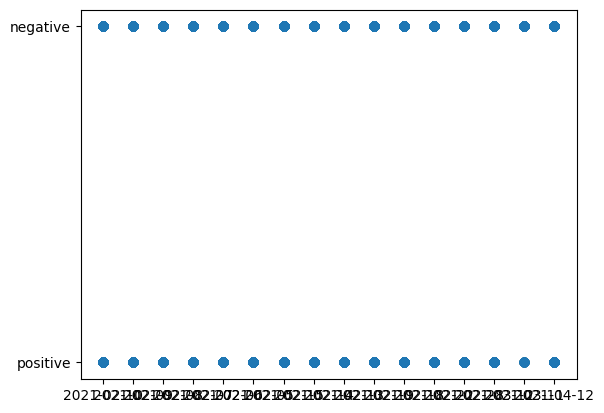

In [651]:
from matplotlib import pyplot as plt

plt.scatter(df_origin['date'],df_origin['new_sentiment'])

In [652]:
""" from sklearn.neighbors import LocalOutlierFactor

# Define the features and target variables
X = df_origin[['price', 'predicted_price', 'first_name',
            'last_name', 'user_followers','user_friends','day',
            'month', 'year', 'text_sentiment']]
y = df_origin['price']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


df_origin['predicted_price'] = yhat.round(2)
df_reduced_1 = df_origin.copy() """

" from sklearn.neighbors import LocalOutlierFactor\n\n# Define the features and target variables\nX = df_origin[['price', 'predicted_price', 'first_name',\n            'last_name', 'user_followers','user_friends','day',\n            'month', 'year', 'text_sentiment']]\ny = df_origin['price']\n# split into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)\n# summarize the shape of the training dataset\nprint(X_train.shape, y_train.shape)\n# identify outliers in the training dataset\nlof = LocalOutlierFactor()\nyhat = lof.fit_predict(X_train)\nmask = yhat != -1\n# select all rows that are not outliers\nmask = yhat != -1\nX_train, y_train = X_train[mask], y_train[mask]\n# summarize the shape of the updated training dataset\nprint(X_train.shape, y_train.shape)\n# fit the model\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n# evaluate the model\nyhat = model.predict(X_test)\n# evaluate predictions\nmae = mean_absolute_e

In [688]:
# Define the features and target variables
X = df_origin[[
              'first_name', 'last_name', 'user_followers','user_friends',
              'day', 'month', 'year','text_sentiment']]
y = df_origin['price']

model = LinearRegression()

# Fit the model to the dataset
model.fit(X, y)

# Create a new dataset with the reduced features
df_origin['predicted_price'] = model.predict(X)


r2 = r2_score( y, df_origin['predicted_price'])

print("R-squared: ", r2)
print("The accuracy of our model is {}%".format(round(r2, 2) *100))


# Create a new dataset with original features and predicted values
df_reduced_1 = df_origin.copy()

df_reduced_1['predicted_price'] = df_reduced_1['predicted_price'].round(2)

df_reduced_1[[
            'date','price', 'predicted_price', 'first_name',
            'last_name', 'user_followers','user_friends','day',
            'month', 'year', 'text_sentiment', 'label']]
df_reduced_1.drop('predicted_price',
  axis='columns', inplace=True)
df_reduced_1.to_csv('../data/processed/database_reduce_1.csv', index=False)
df_reduced_1[:2]

R-squared:  0.6810776602252814
The accuracy of our model is 68.0%


,date,price,first_name,last_name,user_followers,user_friends,day,month,year,description_positive,description_negative,description_neutral,description_sentiment,description_sentiment_label,text_positive,text_negative,text_neutral,text_sentiment,new_sentiment,label
0,2021-02-10,448360.0,2488,8421,8534.0,7605,10,2,2021,0.0,0.0,1.0,1,neutral,0.128,0.0,0.872,2,positive,positive
1,2021-02-10,448360.0,2066,2320,6769.0,1532,10,2,2021,0.0,0.0,1.0,1,neutral,0.225,0.0,0.775,2,positive,positive


Feature 0: 338.972558
Feature 1: 181.553514
Feature 2: 79934.368642
Feature 3: 41654.839290
Feature 4: 66902.410846
Feature 5: 5738.350526
Feature 6: 233.213126
Feature 7: 73.677572
Feature 8: nan
Feature 9: 32225.290916
Feature 10: 2525.970528
Feature 11: 5920.131095
Feature 12: 107.234790
Feature 13: 107.234790
Feature 14: 3150210.733019
Feature 15: 3378629.374018
Feature 16: 396553.376896
Feature 17: 10938.508814
Feature 18: 7660.038002


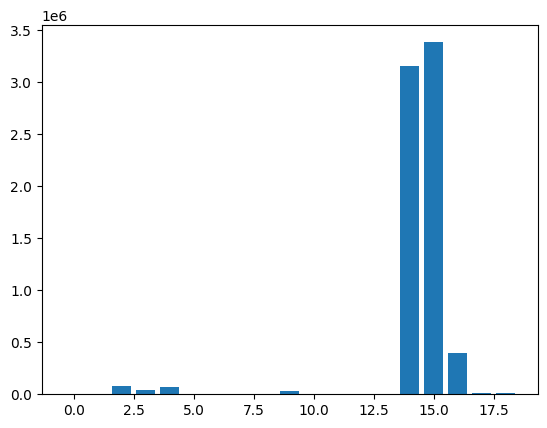

In [689]:

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
 data = pd.read_csv(filename) 

 # retrieve numpy array
 dataset = data.values
 # split into input (X) and output (y) variables
 X = dataset[:, :-1]
 y = dataset[:,-1]
 # format all fields as string
 X = X.astype(str)
 return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
 oe.fit(X_train)
 X_train_enc = oe.transform(X_train)
 X_test_enc = oe.transform(X_test)
 return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('../data/processed/database_reduce_1.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()